# Model Evaluation and Refinement

## Ready Data Environment

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# import data
df = pd.read_csv(r"C:\Users\jdgoe\Downloads\DATA.csv")

In [3]:
df = df._get_numeric_data()
df.head()

,Volume,Weight,CO2,Unnamed: 5
0,1000,790,99,NaN
1,1200,1160,95,NaN
2,1000,929,95,NaN
3,900,865,90,NaN
4,1500,1140,105,NaN


In [4]:
#drop unnamed column
df=df.drop(['Unnamed: 5'], axis=1)

In [5]:
df.head()

,Volume,Weight,CO2
0,1000,790,99
1,1200,1160,95
2,1000,929,95
3,900,865,90
4,1500,1140,105


In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual

## Functions for Plotting

In [7]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize=(12, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('CO2 Emissions')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [8]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    plt.figure(figsize=(12, 10))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([55, 130])
    plt.ylabel('CO2 Emissions')
    plt.legend()

### split data

In [9]:
y_data = df['CO2']

In [10]:
x_data = df.drop('CO2', axis=1)

In [11]:
x_data

,Volume,Weight
0,1000,790
1,1200,1160
2,1000,929
3,900,865
4,1500,1140
5,1000,929
6,1400,1109
7,1500,1365
8,1500,1112
9,1600,1150


In [12]:
# randomly split our data into training and testing data using the function **train_test_split**
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 4
number of training samples: 32


In [13]:
# use function for 40# of data to be tested
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 15
number of training samples: 21


In [14]:
lre = LinearRegression()

In [15]:
lre.fit(x_train[['Weight']], y_train) #test data using 'Weight'

LinearRegression()

In [16]:
lre.score(x_test[['Weight']], y_test) # calculate R^2 on the test data

0.5261991933596604

In [17]:
lre.score(x_train[['Weight']], y_train) # calculate the R^2 score on the training data

0.2064595897061584

Training data has significantly lower R^2

In [18]:
# Find R^2 on the test data using 40% of the dataset for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['Weight']],y_train1)
lre.score(x_test1[['Weight']],y_test1)

-0.15479687116306828

This is likely due to the lack of testing data, let's cross-validate

## Cross-validatrion Score

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
Rcross = cross_val_score(lre, x_data[['Weight']], y_data, cv=4) # cv folds the data by 4

In [21]:
Rcross

array([-0.59102036, -2.00351676, -4.01582879, -7.43221644])

In [22]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -3.5106455875854428 and the standard deviation is 2.5704852079414646


In [23]:
# Use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre,x_data[['Weight']], y_data,cv=4,scoring='neg_mean_squared_error')

array([ 46.35565482,  20.54257144,  54.74064999, 190.7138336 ])

### Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "Weight" feature: 

In [24]:
Rc=cross_val_score(lre,x_data[['Weight']], y_data,cv=2)
Rc.mean()

-1.2811630217894807

In [25]:
from sklearn.model_selection import cross_val_predict #used to predict the output

In [26]:
yhat = cross_val_predict(lre,x_data[['Weight']], y_data,cv=4)
yhat[0:5]

array([92.7802342 , 99.78368258, 95.4112594 , 94.19985211, 99.40511781])

# Fitting Model Selection

Creat Multiple Linear Regression objects and train the model using **'Weight'** and **'Volume'** as features

In [27]:
lr = LinearRegression()
lr.fit(x_train[['Weight', 'Volume']], y_train)

LinearRegression()

In [28]:
# prediction using training data
yhat_train = lr.predict(x_train[['Weight', 'Volume']])
yhat_train[0:5]

array([104.91331274, 106.417011  , 105.27378747, 101.87347348,
       106.27230247])

In [29]:
# prediction using test data:
yhat_test = lr.predict(x_test[['Weight', 'Volume']])
yhat_test[0:5]

array([106.75019081, 101.83742601, 102.26278619,  94.02232099])

Now for some model evaluation using our training and testing data seperately

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


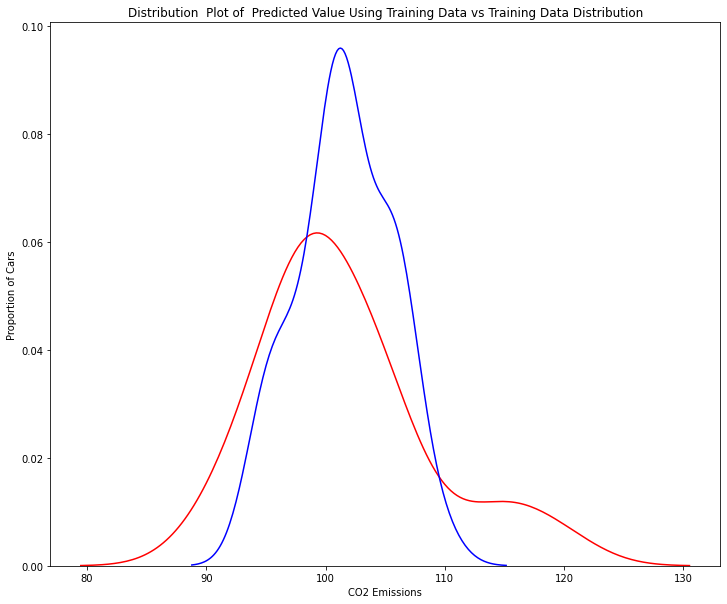

In [31]:
# examine distributuon of the predicted values of the traing data
plt.legend
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Red is the actual Value and blue is the fitted value. This seems rather poor.

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


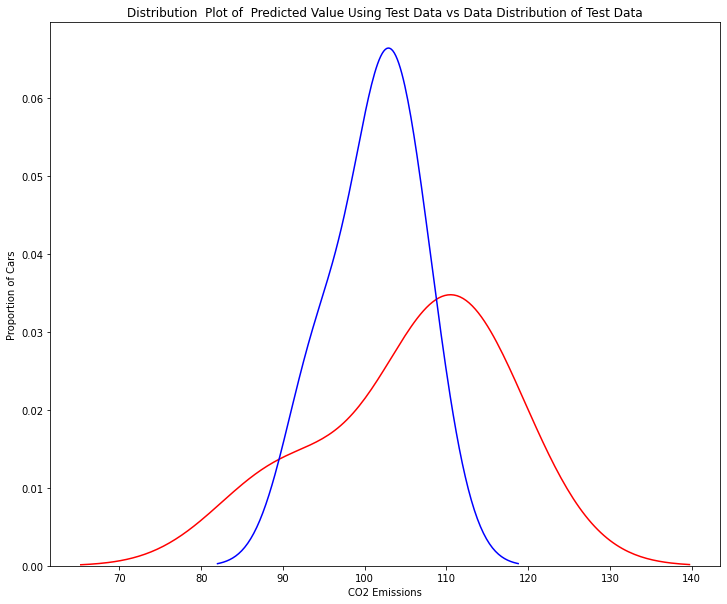

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Appears even worse, let's try a polynomial fit

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
# use 55% of data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [35]:
# erform 5 degree polynomial transformation on 'Weight'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Weight']])
x_test_pr = pr.fit_transform(x_test[['Weight']])
pr

PolynomialFeatures(degree=5)

In [36]:
# Create linear regression model 'poly' and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [37]:
# see prediction output of model
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([152.58806274, 111.84917681,  99.99686199, 114.89117578,
        99.99686199])

Let's compare the predicted values with the actual targets

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [152.58806274 111.84917681  99.99686199 114.89117578]
True values: [117  94  99 115]


Use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


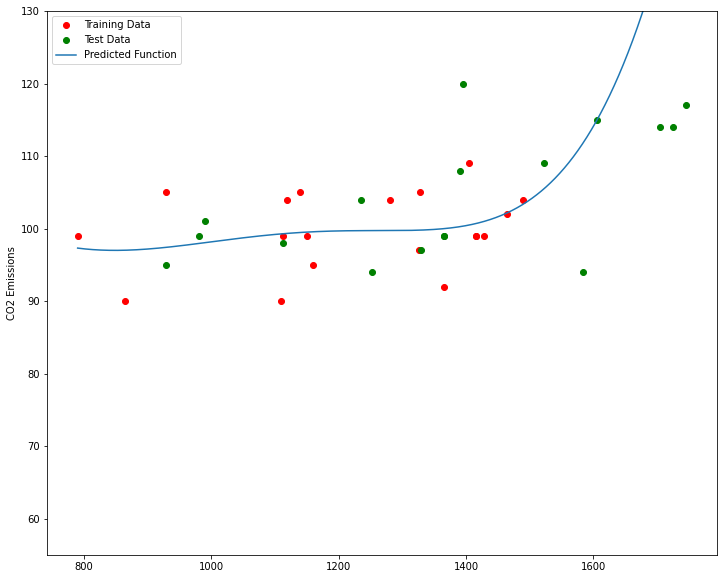

In [39]:
PollyPlot(x_train[['Weight']], x_test[['Weight']], y_train, y_test, poly,pr)

This sems to be a pretty great fit besides it going up too sharply at the end

In [40]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.08354147373485477

In [41]:
# R^2 of the test dat:
poly.score(x_test_pr, y_test)

-1.9453379480714759

Text(3, 0.75, 'Maximum R^2 ')

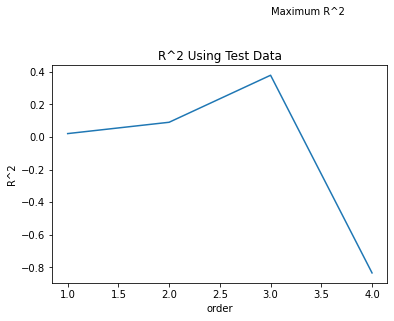

In [42]:
# Test how R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['Weight']])
    
    x_test_pr = pr.fit_transform(x_test[['Weight']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

Order three polynomial has teh highest R^2 score

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['Weight']])
    x_test_pr = pr.fit_transform(x_test[['Weight']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['Weight']], x_test[['Weight']], y_train,y_test, poly, pr)

In [44]:
# interface to experiment with different polynomial orders and different amounts of data
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### Perform polynomial transformations with more than one feature.

In [45]:
pr1=PolynomialFeatures(degree=3)

### Now to transform the training and testing samples for the features 'Weight' and 'Volume'

In [46]:
x_train_pr1=pr1.fit_transform(x_train[['Weight', 'Volume']])

x_test_pr1=pr1.fit_transform(x_test[['Weight', 'Volume']]) 

In [47]:
x_train_pr1.shape #check amount of dimensions

(19, 10)

In [48]:
# create linear regression model
poly1=LinearRegression().fit(x_train_pr1,y_train)

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


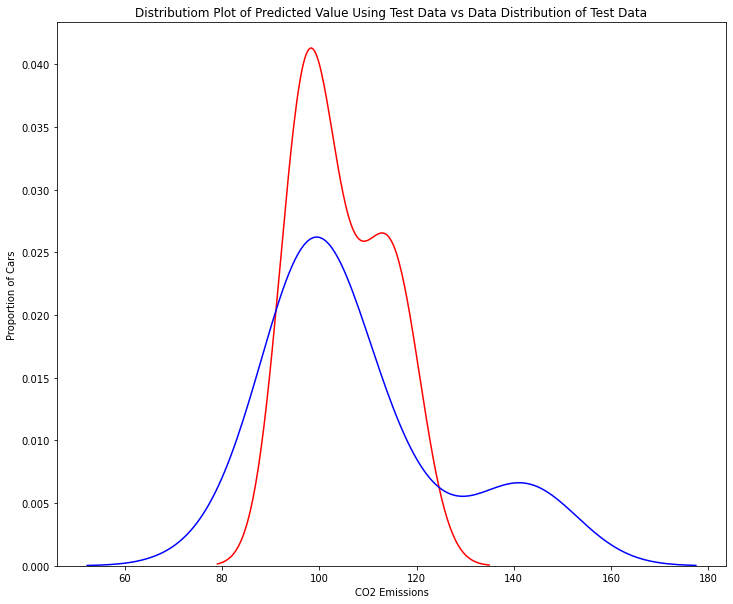

In [49]:
#predict an output on the polynomial features then plot the distribtuion of the test output vs. the actual output
yhat_test1=poly1.predict(x_test_pr1)
Title='Distributiom Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

Not really close fitting at all, both are highest in the 95-105 range

# Ridge Regression

In [50]:
pr=PolynomialFeatures(degree=3)
x_train_pr=pr.fit_transform(x_train[['Weight', 'Volume']])
x_test_pr=pr.fit_transform(x_test[['Weight', 'Volume']]) 

In [51]:
# import ridge model
from sklearn.linear_model import Ridge

In [52]:
RidgeModel=Ridge(alpha=1)

In [53]:
RidgeModel.fit(x_train_pr, y_train)

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.03388e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1)

In [54]:
# prediction
yhat = RidgeModel.predict(x_test_pr)

In [55]:
# compare first five predicted samples to our test set:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [146.23756281 113.15545593  98.31181505 116.6874564 ]
test set : [117  94  99 115]


# Grid Search

Perform Ridge Regression. Calculate the R^2 using the polynomial features.

In [60]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.03388e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


-1.9012578313248292

In [62]:
from sklearn.model_selection import GridSearchCV # Fiond the best hyperparameter

In [63]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [66]:
# Creat Ridge Regression object:
RR=Ridge()
RR

Ridge()

In [70]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [71]:
# Fit the model
Grid1.fit(x_data[['Weight', 'Volume']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [72]:
# Obtain the estimator with the best parameters
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=100000)

In [73]:
# Test our model on the test data
BestRR.score(x_test[['Weight', 'Volume']], y_test)

0.4794853659917535

In [74]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameter
parameters2= [{'alpha': [0.001,0.1,1,10,100,1000,10000,100000,1000000],'normalize':[True,False]}]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['Weight', 'Volume']],y_data)
Grid2.best_estimator_

c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\jdgoe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

Ridge(alpha=1, normalize=True)